In [1]:
# Exercise 9.1 GP posterior
# Repeat problem 8.2 using GaussianProcessRegressor from 
# sklearn.gaussian_process, only plotting the credibility
# regions based on the posterior predictive variance (not drawing samples).

# Some useful hints:
# • As all supervised machine learning methods in sklearn,
# you first have to construct an object from the model class 
# (in this case GaussianProcessRegressor), and thereafter train it
# on data by using its member function fit(). 
# To obtain predictions, use the member function predict(). 
# To the latter, you will either have to pass return_std=True or
# return_cov=True in order to obtain information about the 
# posterior predictive variance.

# • When you construct the model, you have to define a kernel.
# The kernels are available in sklearn.gaussian_process.kernels,
# where the squared exponential/RBF kernel is available as RBF

# • The function fit() automatically optimizes the hyperparameters.
# To turn that feature off, you have to pass the argument
# optimizer=None to GaussianProcessRegressor.
# • To include the measurement noise,
# you can formulate it as part of the kernel by using 
# the kernel WhiteKernel

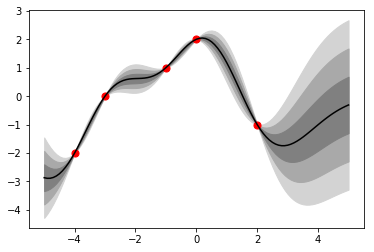

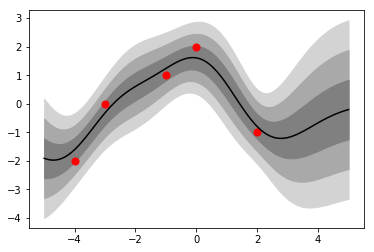

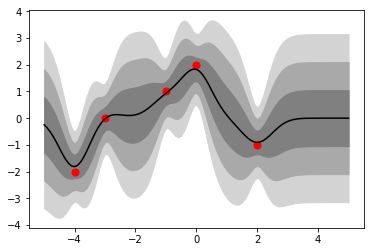

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

n = 5
x = np.array([-4,-3,-1,0,2]) # observed inputs
f = np.array([-2,0,1,2,-1]) # observed function values

m = 101
xs = np.linspace(-5,5,m) # test input vector

# without noise
kernel = RBF(length_scale=np.sqrt(2))
gp = GaussianProcessRegressor(kernel=kernel,optimizer=None).fit(x[:,np.newaxis],f)
f_mean, f_std = gp.predict(xs[:,np.newaxis],return_std=True)
plt.plot(xs,f_mean,'k')
plt.fill_between(xs,f_mean-3*f_std,f_mean+3*f_std,color='lightgray')
plt.fill_between(xs,f_mean-2*f_std,f_mean+2*f_std,color='darkgray')
plt.fill_between(xs,f_mean-1*f_std,f_mean+1*f_std,color='gray')
plt.scatter(x,f,c='r',s=50)
plt.show()

# with noisehttps://designyoutrust.com/2019/09/these-pics-are-composed-of-as-many-pixels-as-there-are-animals-still-alive-in-these-species/?fbclid=IwAR3dMuvPiSQ3hnvD9RjzJe6SC475dNPcxYuvIiVpjRQ1hQO0Ps6HhS8lJno#.XZHtFMd1ESk.facebook
kernel = RBF(length_scale=np.sqrt(2)) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel,optimizer=None).fit(x[:,np.newaxis],f)
f_mean,f_std = gp.predict(xs[:,np.newaxis],return_std=True)
plt.plot(xs,f_mean,'k')
plt.fill_between(xs,f_mean-3*f_std,f_mean+3*f_std,color='lightgray')
plt.fill_between(xs,f_mean-2*f_std,f_mean+2*f_std,color='darkgray')
plt.fill_between(xs,f_mean-1*f_std,f_mean+1*f_std,color='gray')
plt.scatter(x,f,c='r',s=50)
plt.show()

# different length scale
kernel = RBF( length_scale =0.5) + WhiteKernel ( noise_level =0.1)
gp = GaussianProcessRegressor (kernel=kernel , optimizer =None).fit(x[:, np.newaxis], f)
f_mean , f_std = gp.predict(xs[:, np.newaxis], return_std =True)
plt.plot(xs , f_mean , 'k')
plt.fill_between (xs , f_mean - 3*f_std ,f_mean + 3*f_std ,color='lightgray')
plt.fill_between (xs , f_mean - 2*f_std ,f_mean + 2*f_std ,color='darkgray')
plt.fill_between (xs , f_mean - 1*f_std ,f_mean + 1*f_std ,color='gray')
plt.scatter(x, f, c='r', s=50)
plt.show ()


In [17]:
# Exercise 9.2 Learning hyperparameters
# Until now, we have made GP regression using 
# predefined hyperparameters, such as the lengthscale l
# and noise variance σ²
# In this exercise, we will estimate l and σ²
# from the data by maximizing the marginal likelihood.
# That is done automatically by the fit()-function in scikit-learn.
# Use, as before, the RBF kernel and measurement noise together, 
# this time with the data X = [−5 −3 0 0.1 1 4.9 5].T , 
# y = [0 −0.5 1 0.7 0 1 0.7].Thttps://designyoutrust.com/2019/09/these-pics-are-composed-of-as-many-pixels-as-there-are-animals-still-alive-in-these-species/?fbclid=IwAR3dMuvPiSQ3hnvD9RjzJe6SC475dNPcxYuvIiVpjRQ1hQO0Ps6HhS8lJno#.XZHtFMd1ESk.facebook

#(a)
# You still have to provide an initial value of the hyperparameters.
# Try l = 1 and (σ_n)² = 0.1. What hyperparameters do you get when
# optimizing? Plot the corresponding mean and credibility regions.

#(b)
# Try instead to initialize with l = 10 and (σ_n)² = 1. What do you
# get now?

#(c)
# Try to explain what happens by making a grid over different
# hyperparameter values, and inspect the marginal likelihood
# for each point in that grid. The GaussianProcessRegressor class 
# has a member function log_marginal_likelihood() which you may use.
# (Do not forget to turn off the hyperparameter optimization!)

RBF(length_scale=1) + WhiteKernel(noise_level=0.032)


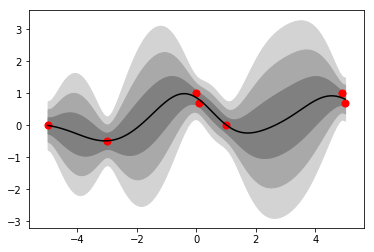

RBF(length_scale=10.7) + WhiteKernel(noise_level=0.222)


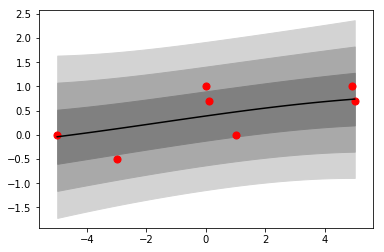

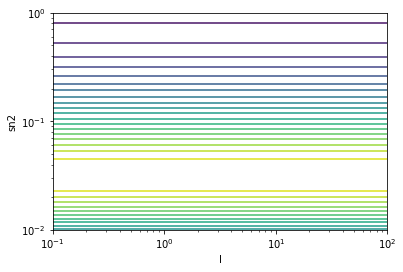

In [43]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

n= 5
x = np.array([-5,-3,0,0.1,1,4.9,5]) # observed inputs
y = np.array([0,-0.5,1,0.7,0,1,0.7]) # observed function values

m = 101
xs = np.linspace(-5,5,m) #test input vector

# optimize hyperparameters
kernel = RBF(length_scale=1) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel).fit(x[:,np.newaxis],y)
print(gp.kernel_)
f_mean, f_std = gp.predict(xs[:,np.newaxis],return_std=True)
plt.plot(xs,f_mean,'k')
plt.fill_between(xs,f_mean-3*f_std,f_mean+3*f_std,color='lightgray')
plt.fill_between(xs,f_mean-2*f_std,f_mean+2*f_std,color='darkgray')
plt.fill_between(xs,f_mean-1*f_std,f_mean+1*f_std,color='gray')
plt.scatter(x,y,c='r',s=50)
plt.show()

# optimize hyperparameters with another initialization
kernel = RBF(length_scale=10) + WhiteKernel(noise_level=1)
gp = GaussianProcessRegressor(kernel=kernel).fit(x[:,np.newaxis],y)
print(gp.kernel_)
f_mean, f_std = gp.predict(xs[:,np.newaxis],return_std=True)
plt.plot(xs,f_mean,'k')
plt.fill_between(xs,f_mean-3*f_std,f_mean+3*f_std,color='lightgray')
plt.fill_between(xs,f_mean-2*f_std,f_mean+2*f_std,color='darkgray')
plt.fill_between(xs,f_mean-1*f_std,f_mean+1*f_std,color='gray')
plt.scatter(x,y,c='r',s=50)
plt.show()

# make a grid of different hyperparameter values to explore
# the marginal likelihood landscape
lv = np.logspace(-1,2,40)
sn2v = np.logspace(-2,0,40)

L,SN2 = np.meshgrid(lv,sn2v)

xv = np.linspace(-6,6,100)

margloglik = np.zeros(L.size)

for i in range(L.size):
    l = L.flatten()[i]
    sn2 = SN2.flatten()[i]
    
    # with noise
    kernel = RBF(length_scale=1) + WhiteKernel(noise_level=sn2)
    gp = GaussianProcessRegressor(kernel=kernel,optimizer=None).fit(x[:,np.newaxis],y)
    
    margloglik[i] = gp.log_marginal_likelihood()
plt.contour(lv,sn2v,np.exp(margloglik.reshape(L.shape)-np.max(margloglik)),levels=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('l')
plt.ylabel('sn2')
plt.show()

In [34]:
# Exercise 9.3 Modeling CO2 levels
# The amount of carbon dioxide in the atmosphere has been measured
# continuously at the Mauna Loa observatory, Hawaii. 
# In this problem, you should use a Gaussian process to model the
# data from 1958 to 2003, and see how well that model can be used
# for predicting the data from 2004-2019. They present their latest
# data at their homepage
# https://www.esrl.noaa.gov/gmd/ccgg/trends/, but for your convenience
# you can use the data in a more convenient format available here
# https://github.com/gpschool/labs/raw/2019/.resources/mauna_loa


316**2 * RBF(length_scale=52.4) + WhiteKernel(noise_level=4.51)


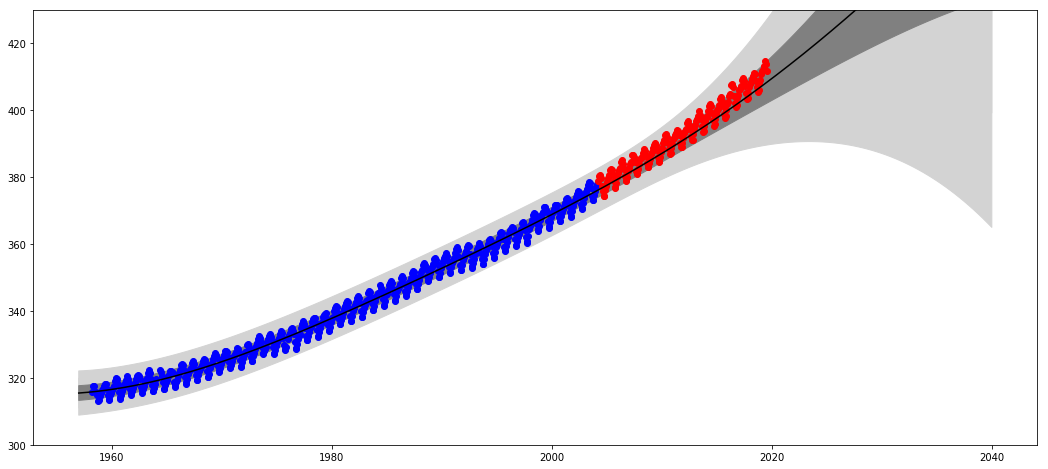

In [38]:
import pickle

with open("mauna_loa","rb") as fid:
    data = pickle.load(fid)
x = data['X'].flatten()
y = data['Y'].flatten()

xtest = data['Xtest'].flatten()
ytest = data['Ytest'].flatten()

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

xs = np.linspace(1957,2040,200)

kernel = 100*RBF(length_scale=100) + WhiteKernel(noise_level=1)
gp = GaussianProcessRegressor(kernel=kernel).fit(x[:,np.newaxis],y)
print(gp.kernel_)

f_mean, f_std = gp.predict(xs[:,np.newaxis],return_std=True)

plt.figure(figsize=(18,8))
plt.plot(xs,f_mean,'k')
plt.fill_between(xs,f_mean-3*f_std,f_mean+3*f_std,color='lightgray')
plt.fill_between(xs,f_mean-2*f_std,f_mean+2*f_std,color='lightgray')
plt.fill_between(xs,f_mean-1*f_std,f_mean+1*f_std,color='gray')
plt.scatter(x,y,c='b')
plt.scatter(xtest,ytest,c='r')
plt.ylim((300,430))
plt.show()